In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Points generator
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])

(225, 225, 3)


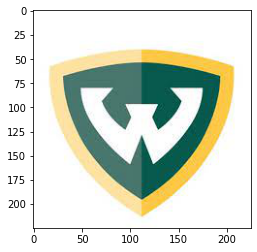

In [3]:
img = plt.imread('WSUlogo.jpeg')
height, width = img.shape[:2]
tx, ty = np.array((width // 2, height // 2))
print(img.shape)
fig = plt.figure()
plt.imshow(img);

In [4]:
R = get_rotation(15)
T = get_translation(tx, ty)
S = get_scale(0.5)

A = T @ R @ S @ np.linalg.inv(T)
Ainv = np.linalg.inv(A)

In [5]:
# set up pixel coordinate I'(x, y)
coords = get_grid(width, height, True)
x2, y2 = coords[0], coords[1]
# Apply inverse transform and round it (nearest neighbour interpolation)
warp_coords = (Ainv@coords).astype(np.int32)
x1, y1 = warp_coords[0, :], warp_coords[1, :]
# Get pixels within image boundaries
indices = np.where((x1 >= 0) & (x1 < width) &
                   (y1 >= 0) & (y1 < height))
xpix1, ypix1 = x2[indices], y2[indices]
xpix2, ypix2 = x1[indices], y1[indices]

xpix1 = [int(ii) for ii in xpix1]
ypix1 = [int(ii) for ii in ypix1]

# Map Correspondence
canvas = np.zeros_like(img)
canvas[ypix1, xpix1] = img[ypix2,xpix2]

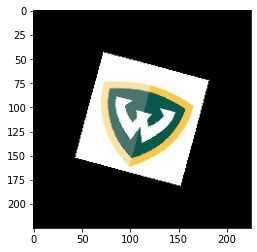

In [7]:
fig = plt.figure()
plt.imshow(canvas);